FIIs

scrap realizado na pagina: https://www.fundsexplorer.com.br/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [3]:
# Configurações do Selenium
driver = webdriver.Chrome()  # This assumes the ChromeDriver is in the PATH
url_alvo = 'https://www.fundsexplorer.com.br/ranking'  # URL alvo para o web scraping

Error getting version of chromedriver 115. Retrying with chromedriver 114 (attempt 1/5)


In [4]:
# Navega para a URL alvo
driver.get(url_alvo)

In [5]:
# Aguarda até que a tabela de fundos seja carregada
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[3]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [6]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, './/tbody/tr')

# Lista para armazenar os dados
dados_fundos = []

In [7]:
# Percorre as linhas e obtém os dados
for linha in linhas_tabela:
    colunas = linha.find_elements(By.TAG_NAME, 'td')
    if len(colunas) >= 27:
        fundos = colunas[0].text
        setor = colunas[1].text
        preço_atual = colunas[2].text
        liquidez_diaria = colunas[3].text
        pvp = colunas[4].text
        ultimo_dividendo = colunas[5].text
        dividendo_yield = colunas[6].text
        dy_3m_acumulado = colunas[7].text
        dy_6m_acumulado = colunas[8].text
        dy_12m_acumulado = colunas[9].text
        dy_3m_media = colunas[10].text
        dy_6m_media = colunas[11].text
        dy_12m_media = colunas[12].text
        dy_ano = colunas[13].text
        variacao_preco = colunas[14].text
        rentabilidade_periodo = colunas[15].text
        rentabilidade_acumulada = colunas[16].text
        patrimonio_liquido = colunas[17].text
        vpa = colunas[18].text
        pvpa = colunas[19].text
        dy_patrimonial = colunas[20].text
        variacao_patrimonial = colunas[21].text
        rentabilidade_patrimonio_periodo = colunas[22].text
        rentabilidade_patrimonio_acumulada = colunas[23].text
        vacancia_fisica = colunas[24].text
        vacancia_financeira = colunas[25].text
        quantidade_de_ativos = colunas[26].text


        dados_fundos.append([fundos, setor, preço_atual, liquidez_diaria, pvp, ultimo_dividendo, dividendo_yield, 
                             dy_3m_acumulado, dy_6m_acumulado, dy_12m_acumulado, dy_3m_media, dy_6m_media, dy_12m_media,
                             dy_ano, variacao_preco, rentabilidade_periodo, rentabilidade_acumulada, patrimonio_liquido, 
                             vpa, pvpa, dy_patrimonial, variacao_patrimonial, rentabilidade_patrimonio_periodo, 
                             rentabilidade_patrimonio_acumulada, vacancia_fisica, vacancia_financeira, quantidade_de_ativos])

In [8]:

# Cria um DataFrame usando Pandas
df = pd.DataFrame(dados_fundos, columns=["Fundos", "Setor", "Preço Atual(R$)", "Liquidez Diária", "P/VP", 
                                         "Ultimo Dividendo", "Dividend Yield", "DY (3M) Acumulado", "DY(6M) Acumulado",
                                         "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
                                         "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", 
                                         "VPA", "P/VPA", "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", 
                                         "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", "Quantidade de Ativos"])



# Finaliza o driver
driver.quit()

In [9]:
df = df.replace('N/A', None)

In [10]:
df.head(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,"9,19","871.611,20","1,01","0,12","1,28 %","3,66 %","7,98 %","7,98 %",...,"230.646.828,88","9,60","0,96","1,46 %","0,00 %","0,00 %","0,00 %",None,None,0
1,ABCP11,SHOPPINGS,"73,00","50.661,52","0,80","0,50","0,70 %","2,12 %","4,39 %","8,89 %",...,"432.162.687,00","91,82","0,80","0,65 %","-0,18 %","0,47 %","7,12 %",None,None,1
2,AFHI11,PAPÉIS,"96,78","1.750.129,88","1,01","1,10","1,11 %","3,38 %","6,80 %","13,31 %",...,"290.388.018,85","94,82","1,02","1,01 %","-0,94 %","0,06 %","5,00 %",None,None,0
3,AGRX11,OUTROS,"11,15","379.437,28",None,"0,17","1,49 %","4,76 %","9,47 %","14,70 %",...,None,None,None,None,None,None,None,None,None,0
4,AIEC11,LAJES CORPORATIVAS,"68,94","542.158,24","0,73","0,76","1,06 %","3,37 %","7,10 %","13,13 %",...,"456.469.305,49","102,56","0,67","0,73 %","0,24 %","0,98 %","9,40 %",None,None,2


In [11]:
df.sample(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
352,VIDS11,FUNDO DE DESENVOLVIMENTO,None,None,None,"129,27","0,00 %","0,00 %","0,00 %","0,00 %",...,"75.315.617,83",None,None,None,None,None,None,None,None,0
154,HOSI11,IMÓVEIS RESIDENCIAIS,"68,24","7.010,92","0,74","0,47","0,67 %","4,59 %","6,62 %","12,59 %",...,"52.797.350,72","93,20","0,73","0,46 %","0,26 %","0,72 %","5,35 %",None,None,0
70,CORM11,LAJES CORPORATIVAS,None,None,None,"0,77","0,90 %","2,76 %","5,35 %","11,38 %",...,None,"90,56",None,"0,89 %","-2,33 %","-1,45 %","0,21 %",None,None,0
82,CXCI11,INDEFINIDO,"89,15","81.447,08","0,92","0,84","1,00 %","3,14 %","6,37 %","12,54 %",...,"198.625.625,72","94,33","0,95","0,88 %","-4,41 %","-3,57 %","2,57 %",None,None,0
227,MORC11,PAPÉIS,"93,85","334.657,04","0,96","1,10","1,16 %","3,60 %","7,21 %","14,49 %",...,"148.091.439,77","96,98","0,97","1,13 %","-0,73 %","0,40 %","3,30 %",None,None,0


In [12]:
df.tail(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
384,XTED11,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",None,None,None,None,...,"67.378.204,04","28,02","0,31","0,00 %","-0,36 %","-0,36 %","-3,45 %",None,None,1
385,YUFI11,FUNDO DE DESENVOLVIMENTO,"95,00","199,00","0,93","0,30","0,37 %","0,85 %","1,09 %","1,09 %",...,"50.096.123,92",None,None,None,None,None,None,None,None,31
386,YUFI11B,INDEFINIDO,None,None,None,"0,63","0,00 %","0,00 %","0,00 %","0,00 %",...,None,"105,53",None,"0,60 %","-0,01 %","0,59 %","6,32 %",None,None,0
387,ZAVI11,INDEFINIDO,"127,56","257.745,76","0,93","1,12","0,88 %","2,67 %","5,24 %","7,88 %",...,"127.018.551,30",None,None,None,None,None,None,None,None,8
388,ZIFI11,FUNDO DE DESENVOLVIMENTO,"1.000,00","11.995,57","0,83","3,31","0,00 %","0,00 %","0,00 %","0,00 %",...,"57.307.512,13",None,None,None,None,None,None,None,None,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fundos                   389 non-null    object
 1   Setor                    389 non-null    object
 2   Preço Atual(R$)          363 non-null    object
 3   Liquidez Diária          353 non-null    object
 4   P/VP                     345 non-null    object
 5   Ultimo Dividendo         389 non-null    object
 6   Dividend Yield           371 non-null    object
 7   DY (3M) Acumulado        371 non-null    object
 8   DY(6M) Acumulado         371 non-null    object
 9   DY(12M) Acumulado        371 non-null    object
 10  DY(3M) Média             371 non-null    object
 11  DY(6M) Média             371 non-null    object
 12  DY(12M) Média            371 non-null    object
 13  DY Ano                   370 non-null    object
 14  Variação do Preço        371 non-null    o

In [14]:
df.isnull().sum()

Fundos                       0
Setor                        0
Preço Atual(R$)             26
Liquidez Diária             36
P/VP                        44
Ultimo Dividendo             0
Dividend Yield              18
DY (3M) Acumulado           18
DY(6M) Acumulado            18
DY(12M) Acumulado           18
DY(3M) Média                18
DY(6M) Média                18
DY(12M) Média               18
DY Ano                      19
Variação do Preço           18
Rentab. Período             18
Rentab. Acumulada          105
Patrimônio Líquido          23
VPA                         93
P/VPA                      100
DY Patrimonial              93
Variação Patrimonial        93
Rentab. Patr. Período       93
Rentab. Patr. Acumulada     93
Vacancia Física            389
Vacancia Financeira        389
Quantidade de Ativos         0
dtype: int64

In [15]:
df.shape

(389, 27)

___

In [16]:
df = df.replace('%', '', regex=True)
df = df.replace('\.', '', regex=True)
df = df.replace(',', '.', regex=True)

In [17]:
df = df.drop(columns='Vacancia Física')

In [18]:
df = df.drop(columns='Vacancia Financeira')

In [19]:
colunas_numericas = ["Preço Atual(R$)", "Liquidez Diária", "P/VP", "Ultimo Dividendo", "Dividend Yield",
 "DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", 
 "DY Ano", "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", 
 "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Quantidade de Ativos"]
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)

In [20]:
df = df.dropna(how='any')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 383
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   244 non-null    object 
 1   Setor                    244 non-null    object 
 2   Preço Atual(R$)          244 non-null    float64
 3   Liquidez Diária          244 non-null    float64
 4   P/VP                     244 non-null    float64
 5   Ultimo Dividendo         244 non-null    float64
 6   Dividend Yield           244 non-null    float64
 7   DY (3M) Acumulado        244 non-null    float64
 8   DY(6M) Acumulado         244 non-null    float64
 9   DY(12M) Acumulado        244 non-null    float64
 10  DY(3M) Média             244 non-null    float64
 11  DY(6M) Média             244 non-null    float64
 12  DY(12M) Média            244 non-null    float64
 13  DY Ano                   244 non-null    float64
 14  Variação do Preço        2

In [25]:
num_estudos = df.shape[0]
print(f"O estudo segue com {num_estudos} estudos.")

O estudo segue com 244 estudos.


___

In [28]:
df

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,9.19,871611.20,1.01,0.12,1.28,3.66,7.98,7.98,...,-2.16,1.64,2.306468e+08,9.60,0.96,1.46,0.00,0.00,0.00,0
1,ABCP11,SHOPPINGS,73.00,50661.52,0.80,0.50,0.70,2.12,4.39,8.89,...,1.18,2.27,4.321627e+08,91.82,0.80,0.65,-0.18,0.47,7.12,1
2,AFHI11,PAPÉIS,96.78,1750129.88,1.01,1.10,1.11,3.38,6.80,13.31,...,1.92,8.99,2.903880e+08,94.82,1.02,1.01,-0.94,0.06,5.00,0
4,AIEC11,LAJES CORPORATIVAS,68.94,542158.24,0.73,0.76,1.06,3.37,7.10,13.13,...,2.09,10.89,4.564693e+08,102.56,0.67,0.73,0.24,0.98,9.40,2
6,ALZM11,FUNDO DE FUNDOS,93.75,85488.24,1.01,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.09,431733.96,0.81,0.65,0.78,2.43,5.19,10.16,...,6.12,18.45,7.301584e+08,103.81,0.80,0.63,-1.37,-0.75,0.75,98
380,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.49,3231102.16,1.01,0.78,0.68,2.08,4.39,8.70,...,0.86,21.59,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
381,XPML11,SHOPPINGS,108.89,8734464.56,1.11,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.08,0.76,-0.66,0.10,6.56,12
382,XPPR11,LAJES CORPORATIVAS,22.07,273715.88,0.31,0.10,0.45,1.31,2.46,7.11,...,-2.17,-28.18,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5


In [29]:
df["Setor"].value_counts()

PAPÉIS                              63
LAJES CORPORATIVAS                  37
INDEFINIDO                          29
FUNDO DE FUNDOS                     29
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    28
SHOPPINGS                           16
MISTO                               14
FUNDO DE DESENVOLVIMENTO             7
IMÓVEIS RESIDENCIAIS                 4
AGÊNCIAS DE BANCOS                   4
HOSPITALAR                           4
EDUCACIONAL                          3
VAREJO                               3
HOTÉIS                               2
IMÓVEIS COMERCIAIS - OUTROS          1
Name: Setor, dtype: int64

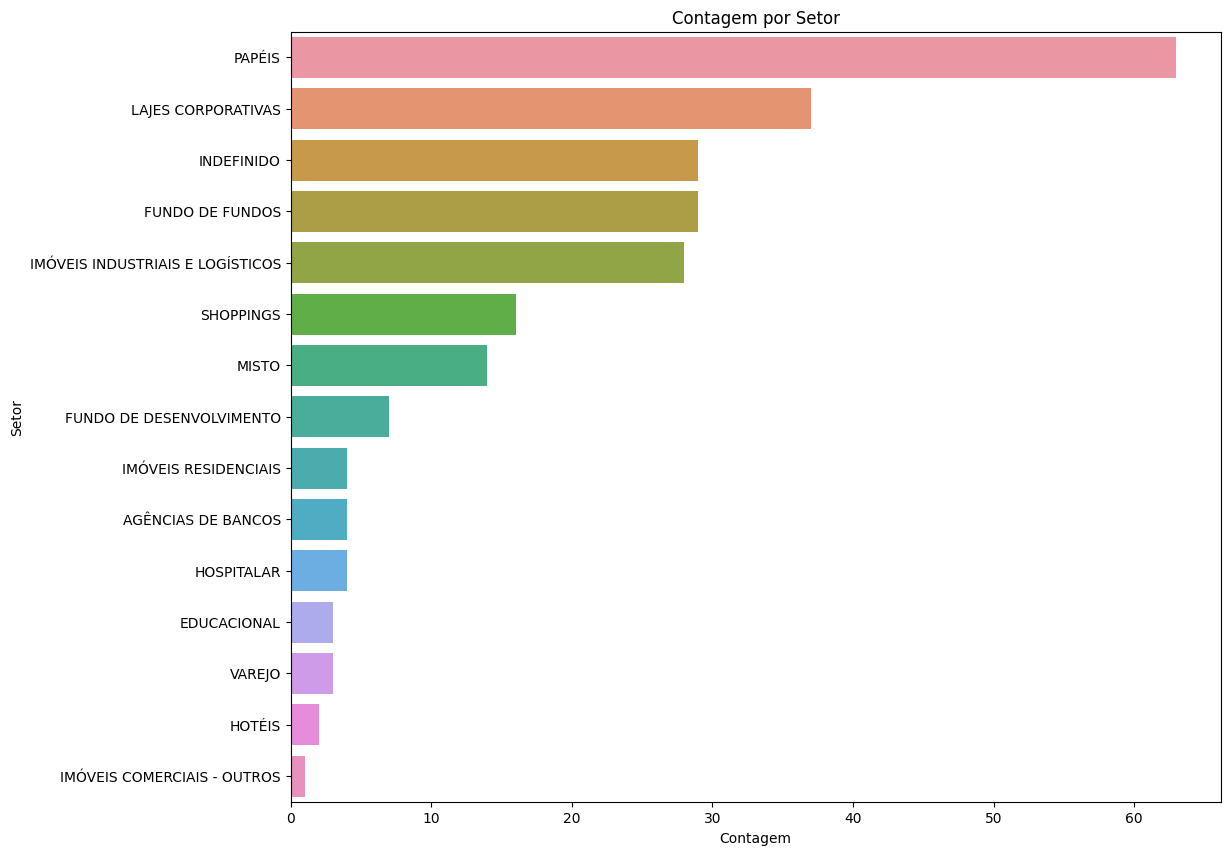

In [30]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Setor', data=df, order=df['Setor'].value_counts().index)
plt.xlabel('Contagem')
plt.ylabel('Setor')
plt.title('Contagem por Setor')
plt.show()

os mais pagadores por tipo, os maiores dividendos, maior pagador, menor pagador


plot para ver outliers de preço por tipo de fiis

___

Geral

In [31]:
df_teste = df[(df['P/VPA'] >= 1)]
df_teste2 = df_teste[(df['Dividend Yield'] >= 1)]
df_teste2 = df_teste2.sort_values(by='Ultimo Dividendo', ascending=False)
pd.Dataframe=df_teste2
df_teste2.head(10)


C:\Users\dougl\AppData\Local\Temp\ipykernel_21392\529632587.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_teste2 = df_teste[(df['Dividend Yield'] >= 1)]


,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
162,HTMX11,HOTÉIS,132.48,656195.72,0.96,1.87,1.40,4.38,7.40,12.67,...,5.91,29.98,2.072571e+08,131.52,1.01,0.97,-0.42,0.55,7.47,23
37,BNFS11,AGÊNCIAS DE BANCOS,121.40,102975.76,1.32,1.53,1.25,3.77,7.47,14.65,...,4.45,8.36,6.420118e+07,99.22,1.22,1.55,-0.03,1.51,13.72,18
75,CRAA11,INDEFINIDO,103.64,234710.80,1.02,1.50,1.44,4.51,4.51,4.51,...,0.96,3.64,5.018725e+07,101.42,1.02,1.48,0.00,0.00,0.00,0
60,CACR11,PAPÉIS,105.30,683199.80,1.01,1.42,1.31,4.26,8.41,17.03,...,3.72,14.71,1.878970e+08,103.41,1.02,1.37,-0.05,1.32,37.55,0
335,TGAR11,FUNDO DE DESENVOLVIMENTO,122.20,4346166.80,1.02,1.40,1.14,3.39,6.93,14.07,...,2.10,9.06,1.647017e+09,114.63,1.07,1.31,-2.00,-0.72,-0.98,8
218,MCHY11,PAPÉIS,110.90,28821.48,1.09,1.40,1.25,3.75,7.55,17.22,...,0.20,9.06,3.653825e+08,99.69,1.11,3.41,-3.72,-0.43,9.03,0
96,EGAF11,INDEFINIDO,100.05,651089.36,1.03,1.40,1.39,4.02,8.15,25.48,...,0.71,6.18,1.095135e+08,98.07,1.02,1.22,0.00,0.00,0.00,0
73,CPTR11,INDEFINIDO,97.94,2046821.96,0.97,1.30,1.34,4.15,8.51,17.42,...,0.00,7.37,4.070996e+08,98.38,1.00,1.37,-0.31,1.06,2.50,0
178,JGPX11,INDEFINIDO,99.80,207766.72,1.00,1.28,1.28,4.00,7.82,15.28,...,-0.03,12.87,8.178438e+07,96.43,1.03,1.21,0.48,1.70,12.76,0
285,RBRY11,PAPÉIS,101.99,1561423.28,1.02,1.25,1.25,3.81,7.59,14.26,...,2.99,11.47,5.549563e+08,99.30,1.03,1.01,-0.58,0.42,3.41,0


In [32]:
novo_df = df_teste2[['Setor','Fundos', 'Ultimo Dividendo', 'P/VPA', 'Preço Atual(R$)']]

In [33]:
novo_df = novo_df.sort_values(by='Ultimo Dividendo', ascending=False)

In [34]:
novo_df

,Setor,Fundos,Ultimo Dividendo,P/VPA,Preço Atual(R$)
162,HOTÉIS,HTMX11,1.87,1.01,132.48
37,AGÊNCIAS DE BANCOS,BNFS11,1.53,1.22,121.40
75,INDEFINIDO,CRAA11,1.50,1.02,103.64
60,PAPÉIS,CACR11,1.42,1.02,105.30
335,FUNDO DE DESENVOLVIMENTO,TGAR11,1.40,1.07,122.20
218,PAPÉIS,MCHY11,1.40,1.11,110.90
96,INDEFINIDO,EGAF11,1.40,1.02,100.05
73,INDEFINIDO,CPTR11,1.30,1.00,97.94
178,INDEFINIDO,JGPX11,1.28,1.03,99.80
285,PAPÉIS,RBRY11,1.25,1.03,101.99


In [35]:
novo_df.groupby(['Setor'])['Ultimo Dividendo'].count().reset_index().sort_values(by='Ultimo Dividendo', ascending=False)

,Setor,Ultimo Dividendo
6,PAPÉIS,16
4,INDEFINIDO,11
0,AGÊNCIAS DE BANCOS,2
1,FUNDO DE DESENVOLVIMENTO,1
2,HOTÉIS,1
3,IMÓVEIS RESIDENCIAIS,1
5,MISTO,1


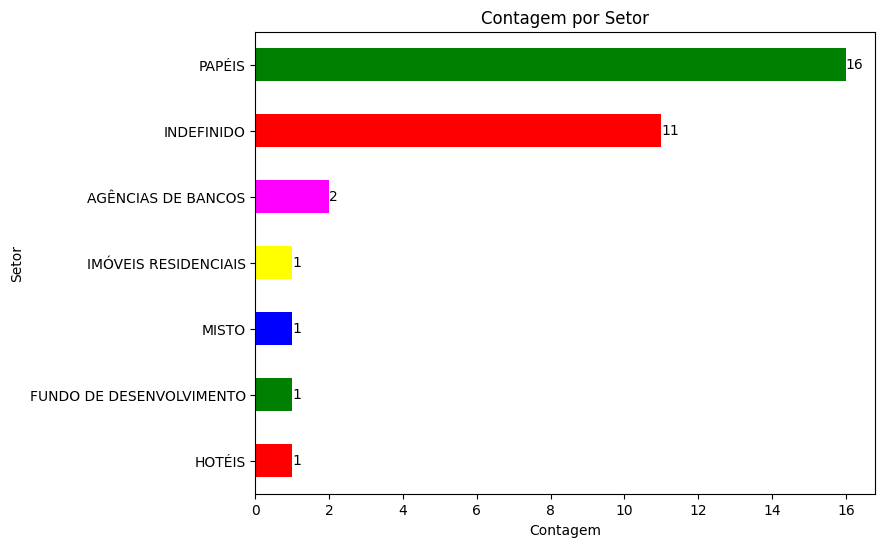

In [36]:
contagem_setor = novo_df['Setor'].value_counts().sort_values(ascending=True)
cores = ['red', 'green', 'blue', 'yellow', 'magenta']
ax = contagem_setor.plot(kind='barh', figsize=(8, 6), color=cores)
plt.title('Contagem por Setor')
plt.xlabel('Contagem')
plt.ylabel('Setor')
for i, v in enumerate(contagem_setor):
    ax.text(v, i, str(v), ha='left', va='center')

plt.show()

In [37]:
df_teste

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
2,AFHI11,PAPÉIS,96.78,1750129.88,1.01,1.10,1.11,3.38,6.80,13.31,...,1.92,8.99,2.903880e+08,94.82,1.02,1.01,-0.94,0.06,5.00,0
7,ALZR11,MISTO,117.79,2918072.36,1.10,0.83,0.70,2.14,4.31,12.40,...,3.60,7.77,1.051986e+09,106.94,1.10,0.68,-0.03,0.65,7.26,13
8,APTO11,IMÓVEIS RESIDENCIAIS,9.94,51975.88,0.94,0.10,1.01,3.25,6.94,13.59,...,0.81,22.40,4.249521e+07,9.97,1.00,1.00,-0.78,0.22,13.14,5
20,BBRC11,AGÊNCIAS DE BANCOS,112.00,154246.36,1.04,1.13,1.03,3.11,6.35,12.29,...,5.76,18.28,1.719502e+08,106.62,1.05,0.93,-0.09,0.84,9.30,20
22,BCIA11,FUNDO DE FUNDOS,104.98,555761.88,0.97,0.82,0.77,2.48,5.32,10.44,...,8.54,32.70,4.040178e+08,101.16,1.04,0.75,-5.66,-4.95,4.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,VGIP11,PAPÉIS,91.18,2311658.40,0.98,1.00,1.09,3.73,7.13,11.79,...,5.28,15.15,1.100810e+09,90.67,1.01,0.50,-1.78,-1.29,8.00,0
351,VGIR11,PAPÉIS,9.78,5245844.92,1.01,0.13,1.34,3.90,7.74,15.35,...,5.59,6.89,9.958174e+08,9.62,1.02,1.35,-0.20,1.15,-89.14,0
356,VISC11,SHOPPINGS,123.56,4336686.88,1.07,0.85,0.71,2.11,4.45,8.70,...,0.63,18.61,2.142724e+09,114.93,1.08,0.66,-0.04,0.62,5.92,20
380,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.49,3231102.16,1.01,0.78,0.68,2.08,4.39,8.70,...,0.86,21.59,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19


In [38]:
df_geral = df.sort_values(by='P/VPA',>1)


SyntaxError: invalid syntax (1943482069.py, line 1)

In [ ]:
df_geral2 = df_geral.sort_values(by='Preço Atual(R$)', ascending=True)

In [ ]:
df_geral2

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
195,KNRE11,FUNDO DE DESENVOLVIMENTO,0.56,13048.10,0.75,0.07,12.52,82.61,138.46,178.41,...,-36.99,6.59,1.399739e+07,0.83,0.67,36.83,-28.53,-2.21,-8.03,1
61,CARE11,MISTO,1.98,17513.07,0.23,0.01,0.23,0.67,1.36,2.92,...,-2.41,-7.39,2.977898e+08,1.60,1.23,0.10,-0.24,-0.14,3.56,1
265,RBDS11,FUNDO DE DESENVOLVIMENTO,2.75,905.47,0.12,2.35,11.21,23.43,54.02,68.55,...,-45.73,-45.73,2.851592e+06,22.98,0.12,0.00,0.00,0.00,0.00,0
337,TORD11,MISTO,3.23,270908.40,0.27,0.05,0.90,2.51,5.20,11.46,...,-23.85,-23.85,4.358046e+08,14.09,0.23,0.57,-0.45,0.12,12.89,1
364,VSLH11,PAPÉIS,4.35,346537.36,0.41,0.03,0.60,1.77,4.59,11.00,...,-11.49,-42.65,3.014196e+08,10.47,0.42,1.05,-0.53,0.51,19.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,FIIB11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,507.87,225809.98,1.10,3.25,0.64,2.00,4.20,8.94,...,4.11,13.84,3.162176e+08,455.67,1.11,0.83,-0.10,0.74,7.62,9
318,SHPH11,SHOPPINGS,799.00,137010.51,0.87,7.82,1.03,2.32,3.82,6.26,...,11.83,7.20,5.429901e+08,889.27,0.90,0.30,0.02,0.33,3.96,1
105,FAMB11B,LAJES CORPORATIVAS,920.24,129941.85,0.34,9.16,0.56,2.18,4.80,10.11,...,-47.51,-53.68,3.084430e+08,3593.26,0.26,0.25,0.53,0.79,12.82,1
15,BBFI11B,LAJES CORPORATIVAS,1120.51,361223.69,0.52,7.19,0.63,2.68,7.20,15.53,...,-34.67,-38.09,2.791857e+08,2854.80,0.39,0.93,0.12,1.06,6.06,3


___

Setor Papéis

In [ ]:
df_papeis = df[df['Setor']=='PAPÉIS']
df_papeis = df_papeis.sort_values(by='Ultimo Dividendo', ascending=False)
df_papeis.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
64,CCRF11,PAPÉIS,90.99,4154.06,0.91,1.65,1.90,3.38,6.30,9.64,...,6.31,6.25,1.568094e+08,96.46,0.94,0.57,-1.87,-1.31,2.72,0
60,CACR11,PAPÉIS,107.80,629922.07,1.03,1.61,1.53,4.39,8.42,17.28,...,0.12,10.60,1.878970e+08,103.41,1.04,1.37,-0.05,1.32,37.55,0
217,MCHY11,PAPÉIS,111.13,384614.02,1.08,1.40,1.25,3.75,7.55,17.22,...,0.20,9.06,3.653825e+08,99.69,1.11,3.41,-3.72,-0.43,9.03,0
342,URPR11,PAPÉIS,100.73,2306002.33,1.00,1.34,1.36,4.15,8.12,15.47,...,2.17,5.26,1.169228e+09,99.33,1.01,1.12,-1.74,-0.64,22.93,0
178,JPPA11,PAPÉIS,100.35,359009.05,1.00,1.33,1.36,4.21,8.30,17.05,...,-0.11,0.12,8.972954e+07,99.04,1.01,1.41,-0.73,0.67,11.76,0
114,FLCR11,PAPÉIS,93.48,157761.26,0.94,1.31,1.35,4.12,7.73,13.65,...,4.18,8.17,6.283179e+07,98.63,0.95,0.91,-0.68,0.23,8.93,0
147,HGIC11,PAPÉIS,106.50,504197.34,0.91,1.28,1.22,2.09,4.66,10.79,...,1.26,-5.08,5.405856e+07,114.02,0.93,0.96,-2.08,-1.14,17.05,0
284,RBRY11,PAPÉIS,101.48,1580592.86,0.99,1.25,1.25,3.81,7.59,14.26,...,2.99,11.47,5.549563e+08,99.30,1.02,1.01,-0.58,0.42,3.41,0
242,OUJP11,PAPÉIS,101.98,636544.17,1.02,1.25,1.22,3.82,7.69,15.39,...,4.81,11.82,3.210059e+08,99.94,1.02,1.20,-1.18,0.01,13.55,0
134,HABT11,PAPÉIS,96.00,1497264.29,0.96,1.20,1.23,4.14,8.26,14.95,...,6.39,17.27,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,0


//*[@id="widget-container"]/div[2]/div[3]/div[2]/div[1]/div/table/tr[1]/td[2]/div/canvas[2]

In [ ]:
driver = webdriver.Chrome()
driver.get('https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/cotacoes/')

In [ ]:
# Aguarda até que a tabela de fundos seja carregada
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="conteudo-principal"]/div[3]/div/div/div[2]/div/div/div[1]/div[1]/div[1]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [ ]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, '//*[@id="conteudo-principal"]/div[3]/div/div/div[2]/div/div/div[1]/div[1]/div[1]')

In [ ]:
linhas_tabela

[<selenium.webdriver.remote.webelement.WebElement (session="f9c756f0723157c8784d2999c44b8aac", element="BF23171BDED933B7F0162B889D6A7F11_element_31")>]

Setor Lajes Corporativas

In [ ]:
df_lajes = df[df['Setor']=='LAJES CORPORATIVAS']
df_lajes = df_lajes.sort_values(by='Ultimo Dividendo', ascending=False)
df_lajes.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
105,FAMB11B,LAJES CORPORATIVAS,920.24,129941.85,0.34,9.16,0.56,2.18,4.80,10.11,...,-47.51,-53.68,3.084430e+08,3593.26,0.26,0.25,0.53,0.79,12.82,1
15,BBFI11B,LAJES CORPORATIVAS,1120.51,361223.69,0.52,7.19,0.63,2.68,7.20,15.53,...,-34.67,-38.09,2.791857e+08,2854.80,0.39,0.93,0.12,1.06,6.06,3
36,BMLC11,LAJES CORPORATIVAS,102.01,26877.22,0.93,3.59,3.47,4.96,6.99,11.61,...,2.87,10.80,1.105971e+08,109.14,0.93,0.81,-0.05,0.76,4.10,2
94,EDFO11B,LAJES CORPORATIVAS,192.50,4389.80,1.06,1.75,0.92,2.65,5.21,9.38,...,0.91,-9.04,4.265095e+07,191.82,1.00,0.86,-0.03,0.82,7.83,1
149,HGPO11,LAJES CORPORATIVAS,289.56,667207.33,0.96,1.60,0.58,1.84,3.76,7.42,...,6.03,9.65,5.243910e+08,267.63,1.08,0.60,-0.05,0.54,5.96,2
150,HGRE11,LAJES CORPORATIVAS,142.00,2525129.62,0.91,1.40,0.99,2.20,4.28,8.07,...,8.02,20.12,1.837461e+09,161.29,0.88,0.48,-0.12,0.36,2.41,19
83,CXCO11,LAJES CORPORATIVAS,85.44,207263.74,0.86,1.31,1.66,3.71,6.84,12.57,...,7.72,19.76,3.887611e+08,96.60,0.88,0.75,0.03,0.77,8.83,10
239,ONEF11,LAJES CORPORATIVAS,200.00,88952.62,0.85,1.02,0.52,1.58,3.29,6.59,...,6.99,16.44,2.095272e+08,201.40,0.99,0.46,15.10,15.63,21.27,1
118,FPAB11,LAJES CORPORATIVAS,186.99,2988.76,0.47,1.00,0.54,2.50,5.53,10.68,...,25.84,43.86,2.806816e+08,410.44,0.46,0.40,0.00,0.40,4.53,2
115,FLMA11,LAJES CORPORATIVAS,142.59,77885.86,0.89,0.97,0.69,2.13,4.11,8.52,...,10.06,13.72,2.206788e+08,157.29,0.91,0.59,0.07,0.66,6.45,2


Setor Indefinido

In [ ]:
df_indefinido = df[df['Setor']=='INDEFINIDO']
df_indefinido = df_indefinido.sort_values(by='Ultimo Dividendo', ascending=False)
df_indefinido.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
17,BBGO11,INDEFINIDO,93.68,402146.02,0.84,2.35,2.60,4.93,8.61,14.53,...,8.38,20.28,3.925504e+08,98.01,0.96,1.04,0.08,1.12,9.31,0
75,CRAA11,INDEFINIDO,103.48,157763.52,1.02,1.50,1.44,4.51,5.97,5.97,...,0.96,6.12,5.018725e+07,101.42,1.02,1.48,0.00,0.00,0.00,0
96,EGAF11,INDEFINIDO,100.40,590684.67,1.03,1.40,1.39,4.02,8.15,25.48,...,0.71,6.18,1.095135e+08,98.07,1.02,1.22,0.00,0.00,0.00,0
177,JGPX11,INDEFINIDO,99.93,247475.90,1.00,1.35,1.33,3.93,7.90,15.00,...,5.65,12.90,8.178438e+07,96.43,1.04,1.21,0.48,1.70,12.76,0
168,IDFI11,INDEFINIDO,38.99,173530.21,0.97,1.30,3.10,13.71,23.95,38.17,...,-4.88,8.39,8.240892e+07,59.67,0.65,0.48,-1.60,-1.13,-18.15,2
73,CPTR11,INDEFINIDO,96.53,1858873.07,0.97,1.30,1.34,4.15,8.51,17.42,...,0.00,7.37,4.070996e+08,98.38,0.98,1.37,-0.31,1.06,2.50,0
190,KNCA11,INDEFINIDO,107.29,2646196.81,1.05,1.29,1.20,3.58,7.09,14.82,...,1.96,7.70,1.441823e+09,102.26,1.05,1.11,0.07,1.18,12.58,0
344,VCRA11,INDEFINIDO,96.60,620734.12,0.98,1.20,1.23,3.77,7.52,15.49,...,-2.09,-1.14,4.713737e+08,102.61,0.94,1.16,0.22,1.38,2.87,0
250,PLCA11,INDEFINIDO,92.00,44151.74,0.88,1.13,1.22,3.85,7.37,12.76,...,9.78,4.18,5.290857e+07,94.99,0.97,1.18,0.00,0.00,0.00,0
125,GCRA11,INDEFINIDO,93.33,337211.33,0.95,1.12,1.16,3.82,7.73,14.98,...,4.08,7.11,1.716086e+08,98.01,0.95,1.31,0.01,1.32,14.22,0


Setor Fundos de Fundos

In [ ]:
df_f_fundos = df[df['Setor']=='FUNDO DE FUNDOS']
df_f_fundos = df_f_fundos.sort_values(by='Ultimo Dividendo', ascending=False)
df_f_fundos.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
186,KFOF11,FUNDO DE FUNDOS,97.48,1040574.43,0.96,1.00,1.08,2.91,5.69,10.81,...,9.71,25.52,4.423125e+08,92.06,1.06,0.78,-6.43,-5.70,6.11,0
180,JSAF11,FUNDO DE FUNDOS,97.45,638684.52,0.99,0.93,1.01,3.16,6.64,13.07,...,6.79,16.31,1.553302e+08,94.13,1.04,0.99,-4.06,-3.12,7.12,0
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
22,BCIA11,FUNDO DE FUNDOS,106.00,804999.50,0.97,0.80,0.81,2.63,5.46,10.56,...,11.26,22.26,4.040178e+08,101.16,1.05,0.75,-5.66,-4.95,4.65,0
71,CPFF11,FUNDO DE FUNDOS,74.24,400125.95,0.89,0.75,1.00,2.32,4.24,9.40,...,14.58,20.74,2.111291e+08,78.73,0.94,0.76,-2.56,-1.82,6.71,0
306,RVBI11,FUNDO DE FUNDOS,85.25,211399.45,0.98,0.75,0.90,2.84,6.02,11.85,...,5.55,20.70,1.244864e+08,83.87,1.02,0.89,-2.88,-2.01,5.11,0
124,GCFF11,FUNDO DE FUNDOS,69.30,87694.83,0.89,0.75,1.15,3.26,6.29,11.93,...,-3.31,-5.59,2.793947e+07,82.69,0.84,0.87,-3.88,-3.05,-3.37,0
241,OUFF11,FUNDO DE FUNDOS,73.59,207722.79,0.94,0.72,1.00,3.15,6.55,13.06,...,8.24,20.23,1.411464e+08,76.15,0.97,0.92,-5.19,-4.32,5.61,3
93,DVFF11,FUNDO DE FUNDOS,85.41,47405.60,0.89,0.70,0.84,2.95,6.08,12.31,...,13.53,24.30,1.050454e+08,91.56,0.93,0.93,-4.01,-3.12,8.77,0
296,RFOF11,FUNDO DE FUNDOS,78.90,74570.38,0.95,0.70,0.92,2.90,5.99,11.72,...,7.50,15.72,8.919809e+07,80.55,0.98,0.91,-6.07,-5.22,1.08,0


Setor Imoveis Industriais e Logisticos

In [ ]:
df_iil = df[df['Setor']=='IMÓVEIS INDUSTRIAIS E LOGÍSTICOS']
df_iil = df_iil.sort_values(by='Ultimo Dividendo', ascending=False)
df_iil.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
85,CXTL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,315.00,27752.02,0.76,7.74,2.41,7.41,16.47,46.33,...,-3.35,-7.09,2.222059e+07,686.89,0.46,0.20,-1.86,-1.66,-1.49,1
111,FIIB11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,507.87,225809.98,1.10,3.25,0.64,2.00,4.20,8.94,...,4.11,13.84,3.162176e+08,455.67,1.11,0.83,-0.10,0.74,7.62,9
101,EURO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,244.95,54851.02,0.75,1.90,0.78,2.34,4.71,9.51,...,5.23,11.63,1.248289e+08,312.91,0.78,0.61,0.01,0.62,6.68,7
148,HGLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,163.65,9624864.33,1.06,1.50,0.90,2.27,4.32,8.93,...,6.05,6.13,3.608679e+09,147.80,1.11,0.74,0.37,1.11,9.68,20
112,FIIP11B,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,178.49,63326.43,0.86,1.44,0.87,2.66,5.49,10.65,...,9.16,18.89,1.883974e+08,186.18,0.96,0.73,-0.12,0.60,0.12,7
233,NEWL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,115.00,1373344.24,0.96,1.37,1.27,3.12,5.92,11.77,...,8.62,17.41,2.404972e+08,120.99,0.95,0.74,-0.31,0.44,13.74,3
128,GGRC11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.26,1376880.93,1.06,1.05,0.85,2.64,5.46,10.44,...,6.32,12.11,9.261843e+08,124.59,0.97,0.82,-0.14,0.68,2.07,17
365,VTLT11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,99.70,176351.12,0.99,0.88,0.88,2.80,5.73,10.98,...,10.81,13.21,2.137423e+08,102.98,0.97,0.81,0.05,0.86,8.91,1
43,BRCO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.25,4047778.33,1.01,0.87,0.75,2.05,3.99,7.92,...,3.93,24.16,1.774187e+09,121.55,1.00,0.58,2.01,2.60,8.31,11
314,SDIL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,96.50,1030917.86,1.03,0.83,0.86,2.61,5.36,10.37,...,2.55,7.49,6.131580e+08,98.33,0.98,0.83,-0.22,0.61,9.86,5


Setor Shoppings

In [ ]:
df_shop = df[df['Setor']=='SHOPPINGS']
df_shop= df_shop.sort_values(by='Ultimo Dividendo', ascending=False)
df_shop.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
257,PQDP11,SHOPPINGS,1995.00,124657.31,0.64,16.99,0.89,2.79,5.74,10.23,...,10.13,-6.16,7.663975e+08,3314.36,0.60,0.50,0.07,0.57,1.70,1
318,SHPH11,SHOPPINGS,799.00,137010.51,0.87,7.82,1.03,2.32,3.82,6.26,...,11.83,7.20,5.429901e+08,889.27,0.90,0.30,0.02,0.33,3.96,1
120,FVPQ11,SHOPPINGS,117.50,59605.40,0.61,1.80,1.65,3.33,6.10,9.52,...,8.51,15.10,5.392802e+08,198.60,0.59,0.28,-0.03,0.25,4.39,1
144,HGBS11,SHOPPINGS,226.25,1836236.24,1.01,1.45,0.67,2.10,4.40,8.46,...,5.61,19.74,2.223429e+09,216.98,1.04,0.65,-0.63,0.02,7.57,12
155,HPDP11,SHOPPINGS,82.98,7680.70,0.93,1.00,1.35,2.71,3.93,6.81,...,5.70,12.18,2.603080e+08,95.00,0.87,0.53,0.14,0.67,5.81,1
355,VISC11,SHOPPINGS,119.57,4520231.98,1.03,0.85,0.71,2.16,4.51,8.69,...,2.16,17.87,2.142724e+09,114.93,1.04,0.66,-0.04,0.62,5.92,20
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
210,MALL11,SHOPPINGS,115.60,3264900.05,0.96,0.80,0.68,2.14,4.48,8.85,...,8.02,18.69,1.094884e+09,107.86,1.07,0.72,1.59,2.33,3.97,9
160,HSML11,SHOPPINGS,94.50,2986709.24,0.99,0.74,0.79,2.50,5.25,9.97,...,7.22,20.51,1.500704e+09,97.37,0.97,0.70,-0.19,0.51,4.26,7
363,VSHO11,SHOPPINGS,80.00,143830.95,0.78,0.72,0.92,2.99,6.09,10.71,...,13.02,21.92,2.113756e+08,98.91,0.81,0.69,0.13,0.82,3.57,3


Setor Misto

In [ ]:
df_misto = df[df['Setor']=='MISTO']
df_misto = df_misto.sort_values(by='Ultimo Dividendo', ascending=False)
df_misto.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
244,OURE11,MISTO,85.00,150179.73,0.92,1.00,1.19,3.69,7.66,15.40,...,4.44,9.87,9.920371e+07,92.02,0.92,1.14,-2.16,-1.04,11.12,4
196,KNRI11,MISTO,161.52,4385313.09,1.01,0.95,0.59,2.16,4.19,7.99,...,1.99,21.26,3.869616e+09,160.12,1.01,0.57,-0.09,0.47,7.86,19
368,VVPR11,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,9.72,...,1.30,15.02,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,6
102,EVBI11,MISTO,97.00,130057.27,0.97,0.86,0.90,2.44,4.84,9.48,...,-0.04,7.81,2.123205e+08,100.21,0.97,0.75,-0.71,0.03,7.70,8
151,HGRU11,MISTO,129.00,4121729.86,1.07,0.85,0.64,2.38,4.55,9.48,...,0.75,14.25,2.273290e+09,120.00,1.08,0.68,-0.37,0.31,9.23,71
310,RZTR11,MISTO,95.14,2064309.23,0.97,0.85,0.90,2.77,5.79,12.41,...,3.52,0.59,1.074906e+09,97.31,0.98,1.28,0.00,1.29,10.37,15
7,ALZR11,MISTO,115.72,2970113.23,1.08,0.83,0.70,2.14,4.31,12.40,...,3.60,7.77,1.051986e+09,106.94,1.08,0.68,-0.03,0.65,7.26,13
316,SEQR11,MISTO,67.45,144692.68,0.72,0.71,1.11,3.37,6.82,12.99,...,4.16,11.20,1.503134e+08,96.27,0.70,0.70,0.22,0.93,7.92,4
312,SARE11,MISTO,59.28,1412854.68,0.64,0.50,0.82,2.63,5.82,11.26,...,-5.20,-4.05,8.736868e+08,94.59,0.63,0.68,-3.24,-2.59,2.42,3
181,JSRE11,MISTO,78.49,2994027.23,0.71,0.46,0.58,1.88,4.07,7.75,...,7.30,13.70,2.340997e+09,113.42,0.69,0.43,0.00,0.44,4.34,6


In [ ]:
df

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,9.42,930832.31,1.01,0.10,1.03,3.83,8.26,8.26,...,1.98,7.77,2.306468e+08,9.60,0.98,1.46,0.00,0.00,0.00,0
1,ABCP11,SHOPPINGS,71.90,59727.24,0.78,0.50,0.70,2.15,4.44,8.96,...,3.54,1.08,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,1
2,AFHI11,PAPÉIS,96.36,992736.38,1.00,1.10,1.11,3.38,6.80,13.31,...,1.92,8.99,2.903880e+08,94.82,1.02,1.01,-0.94,0.06,5.00,0
4,AIEC11,LAJES CORPORATIVAS,71.57,510684.48,0.75,0.78,1.10,3.59,6.31,13.04,...,11.26,8.62,4.564693e+08,102.56,0.70,0.73,0.24,0.98,9.40,2
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,81.04,469376.64,0.79,0.65,0.78,2.43,5.19,10.16,...,6.12,18.45,7.301584e+08,103.81,0.78,0.63,-1.37,-0.75,0.75,98
379,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.27,3722896.52,1.01,0.79,0.69,2.14,4.52,8.76,...,8.57,20.56,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
381,XPPR11,LAJES CORPORATIVAS,22.42,272362.43,0.32,0.10,0.43,1.29,2.93,7.41,...,-1.71,-26.59,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5
